## Introduction <a class='anchor' id='introduction'></a>

In this notebook we will study an incompressible fluid experiencing steady Couette flow. Couette flow is named after French physicist Maurice Couette (1858-1943) who studied viscosity and tested the Navier Stokes equations, pictured here:

<center>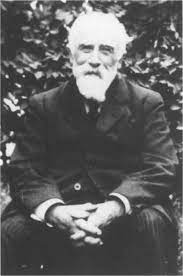</center>

Couette flow involves two parallel plates in which only the top plate is moving, as the top plate moves it collides with the molecules in the top layer of fluid between the plates causing momentum to diffuse into the molecules. The molecules in the top layer then collide with those below continuing the diffusion of momentum; these collisions between layers occur down to the bottom plate, each collision diffusing less momentum and therefore each layer having less velocity. Though idealized, Couette flow has many applications in geological systems like the Earth's mantle and atmosphere as well as in lubrication and thin film applications.

Source: [Maurice Couette](http://homepage.ntu.edu.tw/~wttsai/Adv_Fluid/Maurice.Couette.One.of.the.founders.of.rheology.pdf)

In [6]:
# import libraries that will be needed 
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'iframe'

## Defining the Velocity <a class='anchor' id='v'></a>

First, we require a free body diagram. 

In [7]:
# plot force diagram
fig = go.Figure()
fig.add_shape(type='rect', x0=0, y0=1, x1=4, y1=3, fillcolor='rgba(133, 163, 201, 0.5)')
fig.add_scatter(x=np.linspace(-1,5, 20), y=np.ones(20)*3.5, line_color='black')
fig.add_scatter(x=np.linspace(-1,5, 20), y=np.ones(20)*0.5, line_color='black')
fig.add_annotation(x=-0.1, y=2, ax=-1, ay=2, xref='x', yref='y', axref='x', ayref='y',arrowhead=5, text=
                   r'$\require{color}{\color[rgb]{0.315209,0.728565,0.037706}p}$')
fig.add_annotation(x=4.1, y=2, ax=6, ay=2, xref='x', yref='y', axref='x', ayref='y', arrowhead=5, text=
                   r'$\require{color} {\color[rgb]{0.315209,0.728565,0.037706}p} + \frac{\partial \
                   {\color[rgb]{0.315209,0.728565,0.037706}p}}{\partial x} \delta x$')
fig.add_annotation(x=1, y=0.9, ax=3, ay=0.9, xref='x', yref='y', axref='x', ayref='y', arrowhead=5, 
                   text=r'$\require{color}{\color[rgb]{0.990308,0.800015,0.121270}\tau}$')
fig.add_annotation(x=3.5, y=3.25, ax=0.5, ay=3.25, xref='x', yref='y', axref='x', ayref='y', arrowhead=5, text=
                   r'$\require{color}{\color[rgb]{0.990308,0.800015,0.121270}\tau} + \frac{\partial \
                   {\color[rgb]{0.990308,0.800015,0.121270}\tau}}{\partial y} \delta y$')
fig.add_annotation(x=4, y=3.65, ax=0, ay=3.65, xref='x', yref='y', axref='x', ayref='y', arrowhead=5, 
                   text=r'$\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}$')
fig.add_scatter(x=[2], y=[0.4], mode='text', text=r'$\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}=0$')
fig.add_annotation(x=-1.2, y=3.5, ax=-1.2, ay=0.4, xref='x', yref='y', axref='x', ayref='y', arrowhead=5)
fig.add_scatter(x=[-1.3], y=[2], mode='text', text=r'$H$')
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1, showticklabels=False), xaxis=dict(showticklabels=False),
                  showlegend=False, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

To find the acceleration of a fluid particle we need to use the material derivative

$$
\large
\require{color}
\vec{a} = \frac{D{\color[rgb]{0.059472,0.501943,0.998465}v}}{Dt} = \frac{\partial {\color[rgb]{0.059472,0.501943,0.998465}v}}
{\partial t} + \left({\color[rgb]{0.059472,0.501943,0.998465}v} \cdot \nabla \right){\color[rgb]{0.059472,0.501943,0.998465}v}
$$

Due to the fact that the flow is steady 

$$
\frac{\partial {\color[rgb]{0.059472,0.501943,0.998465}v}}{\partial t} = 0
$$

[Poiseuille flow also begins with the same derivation.]{.aside}


Additionally, velocity in the x-direction is uniform meaning $\frac{\partial {\color[rgb]{0.059472,0.501943,0.998465}v}}{\partial x}=0$ and ${\color[rgb]{0.059472,0.501943,0.998465}v}_y=0$ therefore 

$$
\large
\left({\color[rgb]{0.059472,0.501943,0.998465}v} \cdot \nabla \right){\color[rgb]{0.059472,0.501943,0.998465}v} = \left(v_x \frac{\partial}{\partial x} + v_y \frac{\partial}{\partial y}\right)v = 0
$$

Thus, acceleration in both the x and y directions is zero which tells us that $F_{x}=0$ and $F_{y}=0$. There are two forces acting on the flow, shear and pressure, therefore the vectoral sum of these two forces must sum to zero. The shear stress on the fluid is a function only of y and the pressure is a function only of x, therefore in the y-direction 

$$
\large
\require{color}\frac{\partial {\color[rgb]{0.990308,0.800015,0.121270}\tau}}{\partial x} = \frac{\partial {\color[rgb]{0.315209,0.728565,0.037706}p}}{\partial y} = 0
$$

For the $x$ components of shear and pressure to sum to zero they must both be constant along their respective axes. By using the above force diagram we can get a relationship between 

$$
\large
\require{color}\frac{\partial {\color[rgb]{0.315209,0.728565,0.037706}p}}{\partial x} \; \; \text{and} \; \;  \require{color}\frac{\partial {\color[rgb]{0.990308,0.800015,0.121270}\tau}}{\partial y}
$$

$$
\large
\require{color}F_{x} = 0
$$

$$
\large
\Rightarrow {\color[rgb]{0.315209,0.728565,0.037706}p}\delta y -  \left({\color[rgb]{0.315209,0.728565,0.037706}p}+\frac{\partial {\color[rgb]{0.315209,0.728565,0.037706}p}}{\partial x} \delta x\right)\delta y - {\color[rgb]{0.990308,0.800015,0.121270}\tau}\delta x + \left({\color[rgb]{0.990308,0.800015,0.121270}\tau} + \frac{\partial {\color[rgb]{0.990308,0.800015,0.121270}\tau}}{\partial y} \delta y\right)\delta x
$$

$$
\large
\Rightarrow \frac{\partial {\color[rgb]{0.315209,0.728565,0.037706}p}}{\partial x} = \frac{\partial {\color[rgb]{0.990308,0.800015,0.121270}\tau}}{\partial y}
$$

As pressure is only a function of $x$ and shear stress is only a function of $y$ we can say the partial derivatives from above can be converted to total derivatives $\require{color}\frac{d{\color[rgb]{0.315209,0.728565,0.037706}p}}{dx} = \frac{d{\color[rgb]{0.990308,0.800015,0.121270}\tau}}{dy}$. Furthermore, we know the equation for shear stress: $\require{color}{\color[rgb]{0.990308,0.800015,0.121270}\tau} = {\color[rgb]{0.990448,0.502245,0.032881}\mu} \frac{d{\color[rgb]{0.059472,0.501943,0.998465}v}_{x}}{dy}$ so we can get a relationship between velocity and the pressure gradient:

$$
\large
\require{color}\frac{d}{dy}\left({\color[rgb]{0.990448,0.502245,0.032881}\mu} \frac{d{\color[rgb]{0.059472,0.501943,0.998465}v}_{x}}{dy}\right) = {\color[rgb]{0.990448,0.502245,0.032881}\mu} \frac{d^{2}{\color[rgb]{0.059472,0.501943,0.998465}v}_{x}}{dy^{2}} = \frac{d{\color[rgb]{0.315209,0.728565,0.037706}p}}{dx}
$$

In Couette flow the pressure gradient is zero, therefore: $\require{color}{\color[rgb]{0.990448,0.502245,0.032881}\mu} \frac{d^{2}{\color[rgb]{0.059472,0.501943,0.998465}v}_{x}}{dy^{2}} =0$ and we can assume a solution in the form $\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}=By+C$. Using the boundary conditions $\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}(0)=0$ and $\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}(H)={\color[rgb]{0.059472,0.501943,0.998465}V}$ we can find the solution $\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}={\color[rgb]{0.059472,0.501943,0.998465}V} \frac{y}{H}$.

Let us consider some representative values as shown in the code block below.

In [3]:
# define arbitary constants and the x,y, and velocity values
H=10
V=100
x=np.zeros(10)
y=np.linspace(0, H-1, 10)
v_x=V*(y/H)
v_y=np.zeros(10)

## Visualizing the Flow <a class='anchor' id='graphs'></a>

We are now ready to visualize what this looks like!

In [4]:
# plot vector diagram of the flow velocity profile
fig = ff.create_quiver(x=x, y=y, u=v_x, v=v_y, arrow_scale=0.05)
fig.update_layout(xaxis=dict(range=[-1, 11]))
fig.add_scatter(x=np.linspace(-1,10, 20), y=np.ones(20)*10, line_color='black')
fig.add_scatter(x=np.linspace(-1,10, 20), y=np.zeros(20), line_color='black')
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1, showticklabels=False), xaxis=dict(showticklabels=False),
                  showlegend=False, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

The plot above shows the velocity vectors at 9 points between the two walls, and illustrates how particles closest to the moving top wall have the most velocity and momentum and this decreases linearly with distance from the top.

In [5]:
# find the total time for the top particle to reach x=10 then calculate the distance each particle travels in that time
time = 20/v_x[9]
total_distance = time*v_x

# use time and distance information to show how the horizontal distance bewteen particles starting at the same place changes
fig = go.Figure()
frames = [go.Frame(data=[]) for k in range(50)]
for i, y_pos in enumerate(y[1:len(y)]):
    fig.add_scatter(x=np.linspace(0, 20, 20), y=np.ones(20)*y_pos, line_dash='dash', line_color='lightsteelblue')
    x_pos = np.linspace(0, total_distance[i+1], 50)
    for j,f in enumerate(frames):
        f.data += (go.Scatter(x=[x_pos[j]], y=[(np.ones(50)[j]*y_pos)], mode='markers', marker=dict(color='teal', size=10)),)

fig.update(frames=frames)

fig.update_layout(updatemenus = [dict(type='buttons', buttons=[dict(label='play', method='animate', 
                  args=[None, {'frame':{'duration':50}}])])], showlegend=False, xaxis=dict(range=[0,20]))

fig.add_scatter(x=np.linspace(0, 20, 20), y=np.ones(20)*H, line_color='black')
fig.add_annotation(x=18, y=10.25, ax=2, ay=10.25, xref='x', yref='y', axref='x', ayref='y', arrowhead=5, 
                   text=r'$\require{color}{\color[rgb]{0.059472,0.501943,0.998465}v}$')
fig.add_scatter(x=np.linspace(0, 20, 20), y=np.zeros(20), line_color='black')
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1, showticklabels=False), xaxis=dict(showticklabels=False),
                  showlegend=False, plot_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

This plot animates how an ideallized fluid would move between the two plates, and illustrates how the velocity is a linear function of y.